<a href="https://colab.research.google.com/github/Roterdamjr/Mestrado/blob/main/Markowitz_Simples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Biblioteca

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [146]:
def fn_carteira(df,w, risk_free = 0):
  #### RETORNO ####
  r = df.mean()* len(df)   # matriz de retornos
  Rp = np.dot(r,w)    # retorno do portfolio

  #### RISCO ####

  # matriz de covariância
  matriz_cov = np.cov((df.T))

  # risco (desvio padrão)
  mat_w = np.array(w)
  Sa = np.sqrt(np.dot(mat_w.T, np.dot(matriz_cov, mat_w))) * np.sqrt(len(df) )

  # sharpe
  sharpe = (Rp - risk_free)/Sa

  return Rp, Sa , sharpe


def fn_gera_carteiras(df, numero_carteiras , risk_free=0 ):
  pesos = []
  retornos = []
  riscos = []
  sharpes = []

  for w in fn_matriz_pesos(numero_carteiras):
    Rp, Sa ,sharpe = fn_carteira(df,w,risk_free)
    pesos.append(w)
    retornos.append(Rp)
    riscos.append(Sa)
    sharpes.append(sharpe)

  carteiras = {'pesos': pesos,
                'returns': retornos,
                'riscos':riscos}

  return carteiras

def plota(retornos, riscos, labels=None):
    plt.figure(figsize=(6,4))
    plt.scatter(riscos, retornos, color='blue')
    plt.title("Fronteira Eficiente")
    plt.xlabel("Risco (Desvio Padrão)")
    plt.ylabel("Retorno Esperado")
    plt.grid(True)

    # Adiciona os rótulos
    if labels != None:
      for i in range(len(labels)):
          plt.text(riscos[i] , retornos[i] , str(labels[i]), fontsize=9)

    plt.show()

def fn_matriz_pesos(numero_carteiras):
  # gera uma matriz de numero_carteira linhas e numero de qtde de taivos colunas
  matriz_pesos =[]
  for _ in range(1,numero_carteiras):
    k = np.random.rand(len(df.columns))
    pesos = np.round( k / sum (k) ,2)
    matriz_pesos.append(pesos)

  return matriz_pesos

# Exemplo Trivial

In [ ]:
dados = [
  [-0.05, 0],
  [-0.25, -0.05],
  [	0.3,	0.15],
  [	0.2,	0.15],
  [	0.15,	0.05],
  [	0.3,	0.15],
  [	0.4,	0.45],
  [	0.15,	-0.1]
]

df = pd.DataFrame(dados ,columns=['Fundo Cambial', 'Fundo de Acoes'])

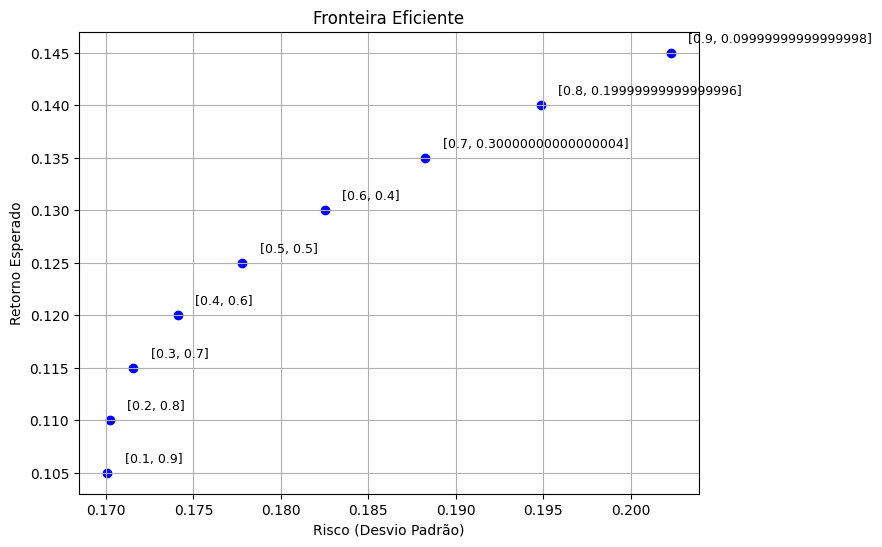

In [ ]:
pesos = []
retornos = []
riscos = []

for w in fn_matriz_pesos():
  Rp, Sa = fn_carteira(df,w)
  pesos.append(w)
  retornos.append(Rp)
  riscos.append(Sa)

carteiras = {'pesos': pesos,
              'returns': retornos,
              'riscos':riscos}

plota(retornos, riscos, pesos)

# Carteira com 2 ativos

In [147]:
df_precos = pd.DataFrame()
tickers = ['ITUB4.SA', 'PETR4.SA']

df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31")['Close']
df = df_precos.pct_change()
df = df.dropna()

/tmp/ipython-input-147-2843269260.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31")['Close']
[*********************100%***********************]  2 of 2 completed


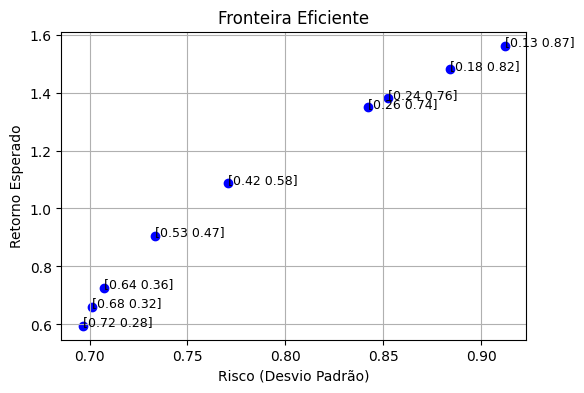

In [148]:
carteiras = fn_gera_carteiras(df ,10)
retornos, riscos, pesos = carteiras['returns'], carteiras['riscos'], carteiras['pesos']
plota(retornos, riscos, pesos)

# Carteira com 3 ativos

In [135]:
df_precos = pd.DataFrame()
tickers = ['ITUB4.SA', 'PETR4.SA', 'LREN3.SA']

df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31")['Close']
df = df_precos.pct_change()
df = df.dropna()

/tmp/ipython-input-135-3823803092.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31")['Close']
[*********************100%***********************]  3 of 3 completed


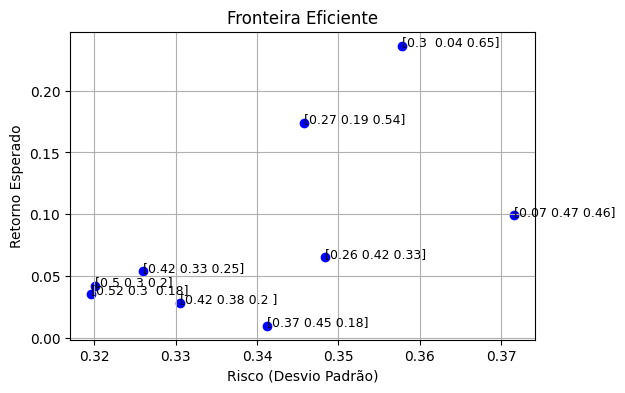

In [136]:
carteiras = fn_gera_carteiras(df ,10)
retornos, riscos, pesos = carteiras['returns'], carteiras['riscos'], carteiras['pesos']
plota(retornos, riscos, pesos)

# Carteira com varios pesos

In [137]:
df_precos = pd.DataFrame()
tickers = ['ITUB4.SA', 'PETR4.SA', 'LREN3.SA']

df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31")['Close']
df = df_precos.pct_change()
df = df.dropna()

/tmp/ipython-input-137-3823803092.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31")['Close']
[*********************100%***********************]  3 of 3 completed


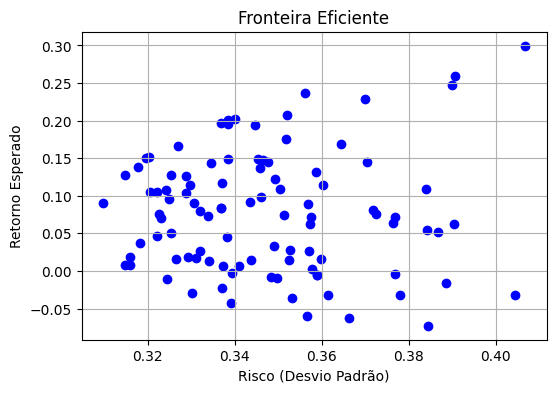

In [138]:
carteiras = fn_gera_carteiras(df ,100)
retornos, riscos, pesos = carteiras['returns'], carteiras['riscos'], carteiras['pesos']
plota(retornos, riscos)

# Ativo livre de risco

In [139]:
df_precos = pd.DataFrame()
tickers = [ 'PETR4.SA']

df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31")['Close']
df = df_precos.pct_change()
df = df.dropna()

/tmp/ipython-input-139-72783563.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df_precos = yf.download(tickers,  "2020-01-01", "2024-12-31")['Close']
[*********************100%***********************]  1 of 1 completed


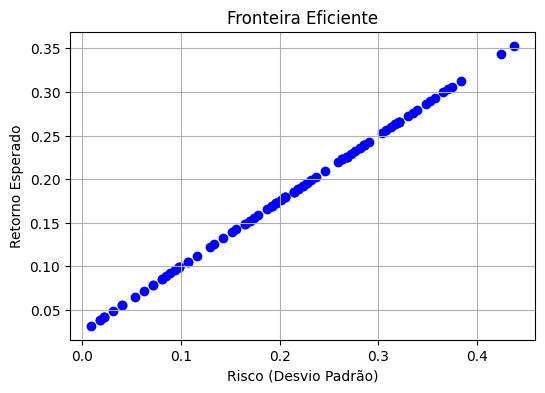

In [142]:
df['rf']  = .0001
carteiras = fn_gera_carteiras(df ,100)
retornos, riscos, pesos = carteiras['returns'], carteiras['riscos'], carteiras['pesos']
plota(retornos, riscos)

In [111]:
df.insert(0,'rf',12)

In [116]:
df

Ticker,rf,PETR4.SA
Date,,
2020-01-03,12,-0.814343
2020-01-06,12,1.182269
2020-01-07,12,-0.389495
2020-01-08,12,-0.619094
2020-01-09,12,-0.327873
...,...,...
2024-12-20,12,-0.834234
2024-12-23,12,0.027144
2024-12-26,12,-2.957141
